# Classification

###  Task-2: Predicting Customer Churn

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('WA_Fn-useC_-Telco-Customer-churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1622,2361-UPSND,Female,0,Yes,No,46,Yes,No,DSL,Yes,...,No,Yes,No,Yes,One year,No,Mailed check,70.60,3231.05,No
4640,1853-UDXBW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.00,70,Yes
4789,0511-JTEOY,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,71.10,71.1,Yes
671,3088-FVYWK,Male,0,Yes,Yes,53,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.55,1336.1,No
3917,3871-IKPYH,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,69.10,69.1,Yes
461,6614-VBEGU,Female,0,Yes,No,24,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),69.45,1614.05,No
1846,7369-TRPFD,Male,0,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,279.2,No
2449,1357-MVDOZ,Male,0,Yes,Yes,11,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),59.65,683.25,No
1596,7321-VGNKU,Female,0,Yes,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.35,120.25,No
4377,8212-CRQXP,Female,0,Yes,No,22,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),80.00,1706.45,No


In [5]:
df.drop(['customerID'],axis=1,inplace=True)

In [6]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1851,Female,0,Yes,No,2,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.10,68.75,Yes
1962,Male,0,No,No,23,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),99.95,2292.75,No
1204,Male,0,Yes,Yes,18,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),25.55,467.85,No
143,Male,0,No,No,64,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,One year,Yes,Credit card (automatic),84.30,5289.05,No
6264,Male,0,No,No,44,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),100.10,4378.35,No


| **Column Name**    | **Description**                                                                                                  |
| ------------------ | ---------------------------------------------------------------------------------------------------------------- |
| `customerID`       | Unique ID assigned to each customer                                                                              |
| `gender`           | Customer's gender: Male or Female                                                                                |
| `SeniorCitizen`    | Whether the customer is a senior citizen:<br>`1` = Yes, `0` = No                                                 |
| `Partner`          | Whether the customer has a partner: Yes or No                                                                    |
| `Dependents`       | Whether the customer has dependents (children or others): Yes or No                                              |
| `tenure`           | Number of months the customer has stayed with the company                                                        |
| `PhoneService`     | Whether the customer has phone service: Yes or No                                                                |
| `MultipleLines`    | Whether the customer has multiple lines:<br>‘No’, ‘Yes’, or ‘No phone service’                                   |
| `InternetService`  | Customer’s internet service provider:<br>‘DSL’, ‘Fiber optic’, or ‘No’                                           |
| `OnlineSecurity`   | Whether the customer has online security:<br>‘Yes’, ‘No’, or ‘No internet service’                               |
| `OnlineBackup`     | Whether the customer has online backup:<br>‘Yes’, ‘No’, or ‘No internet service’                                 |
| `DeviceProtection` | Whether the customer has device protection:<br>‘Yes’, ‘No’, or ‘No internet service’                             |
| `TechSupport`      | Whether the customer has technical support:<br>‘Yes’, ‘No’, or ‘No internet service’                             |
| `StreamingTV`      | Whether the customer streams TV:<br>‘Yes’, ‘No’, or ‘No internet service’                                        |
| `StreamingMovies`  | Whether the customer streams movies:<br>‘Yes’, ‘No’, or ‘No internet service’                                    |
| `Contract`         | Customer’s contract type:<br>‘Month-to-month’, ‘One year’, ‘Two year’                                            |
| `PaperlessBilling` | Whether the customer uses paperless billing: Yes or No                                                           |
| `PaymentMethod`    | Payment method:<br>‘Electronic check’, ‘Mailed check’,<br>‘Bank transfer (automatic)’, ‘Credit card (automatic)’ |
| `MonthlyCharges`   | The amount charged to the customer monthly                                                                       |
| `TotalCharges`     | The total amount charged to the customer till date                                                               |
| `Churn`            | Whether the customer has left the company:<br>‘Yes’ = Churned, ‘No’ = Stayed                                     |


In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("-----------------------------------------")

gender
Male      3555
Female    3488
Name: count, dtype: int64
-----------------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
-----------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
-----------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
-----------------------------------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
-----------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
-----------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
-----------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
-----------------------------

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(22)

In [10]:
df.drop_duplicates(inplace=True)

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [18]:
df.dropna(inplace=True)

In [13]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [25]:
cat_cols = df.columns
cat_cols = cat_cols.drop(num_cols)
cat_cols = cat_cols.drop(['Churn'])

In [26]:
df.shape

(7010, 20)

### 1 : EDA

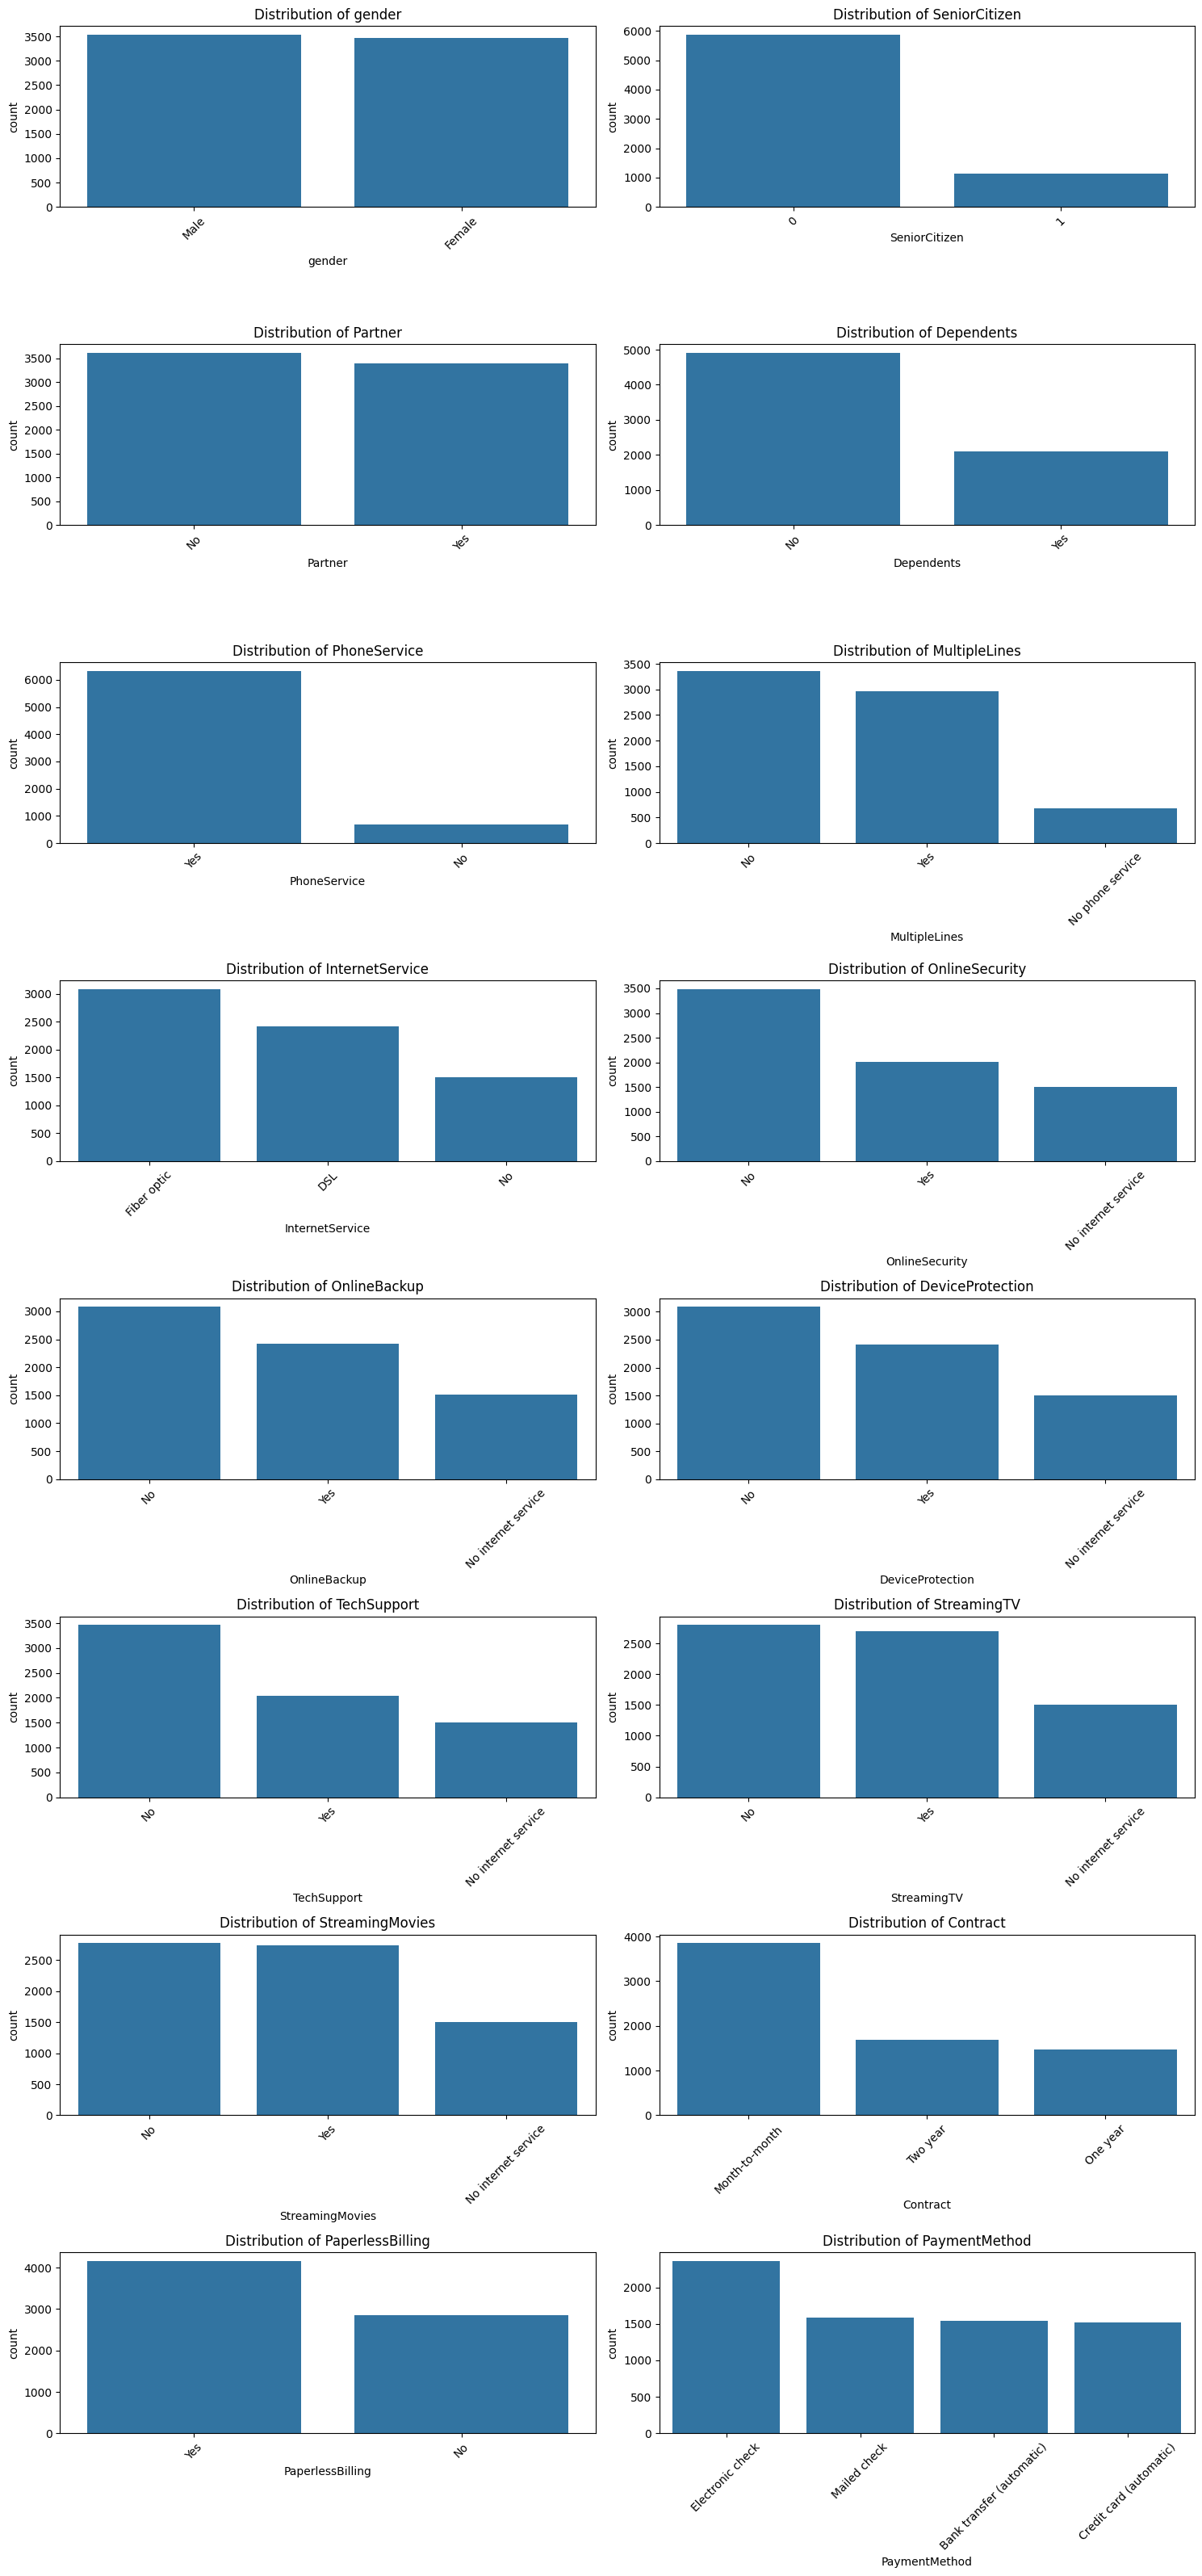

In [27]:
n = len(cat_cols)
rows = (n + 1) // 2

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, 2, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

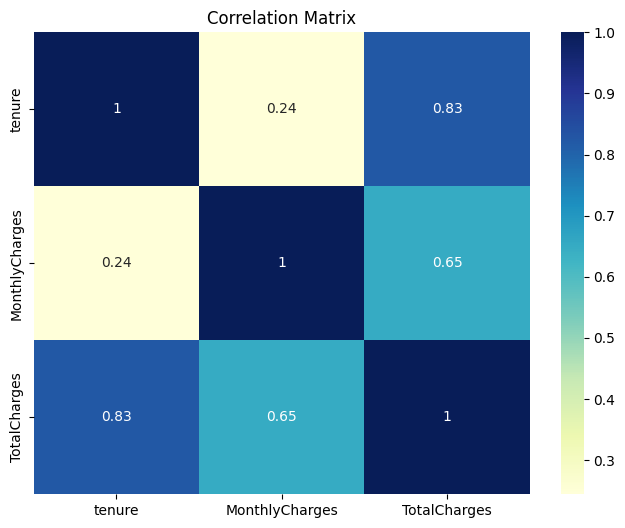

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

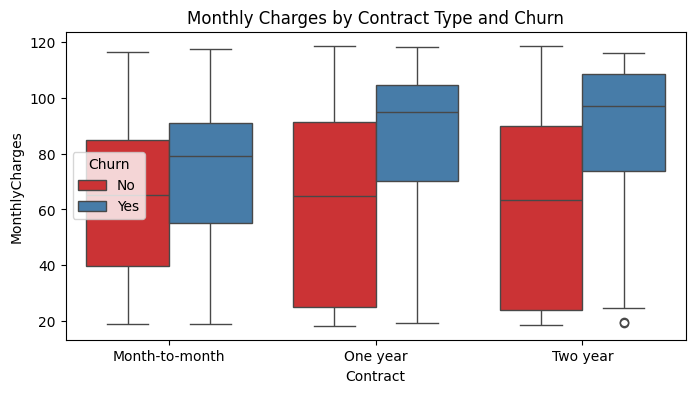

In [31]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn', palette='Set1')
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()

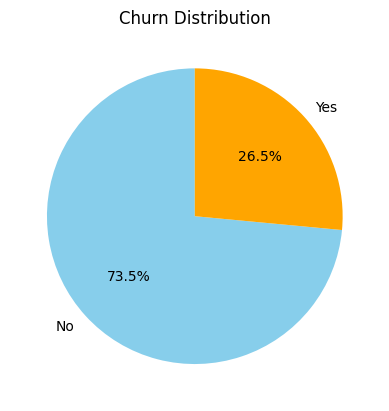

In [32]:
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue','orange'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

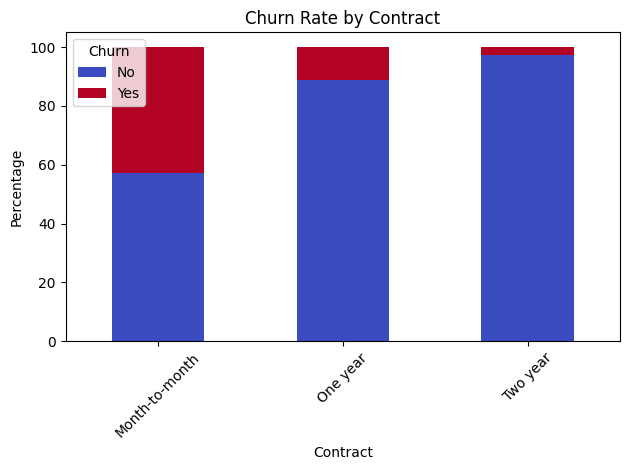

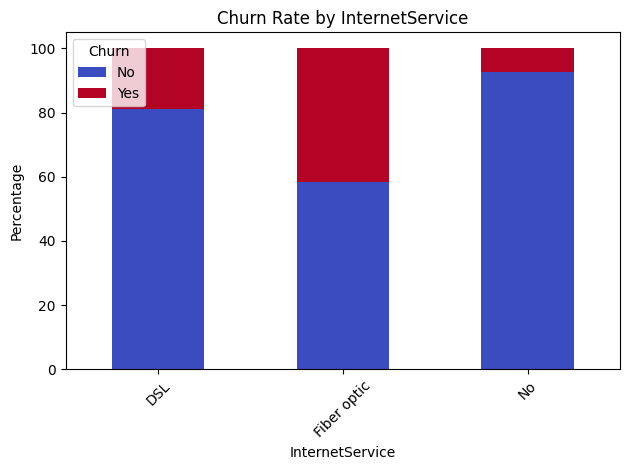

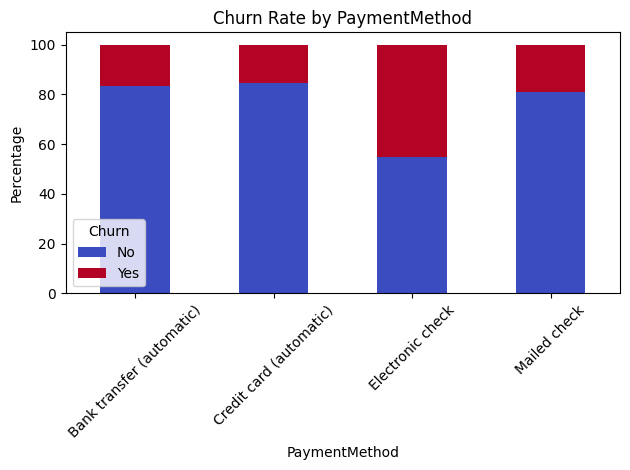

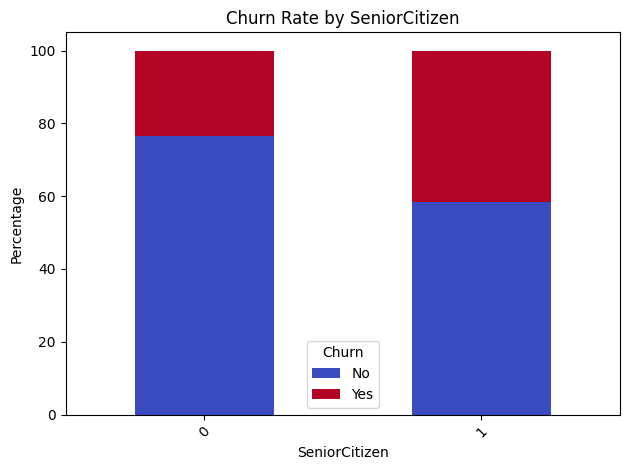

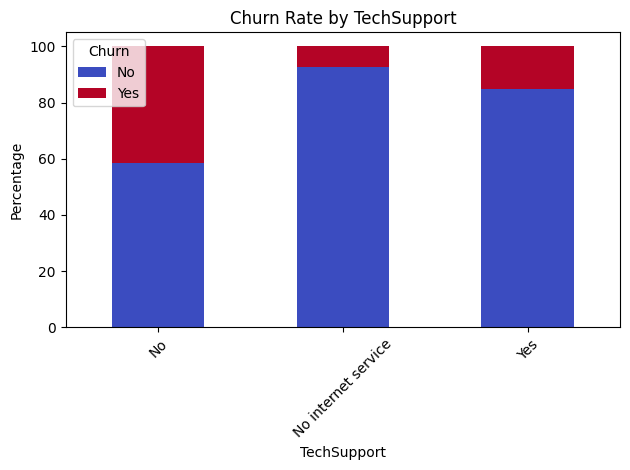

In [36]:
def stacked_barplot(col):
    cross_tab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, colormap='coolwarm')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.legend(title='Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for col in ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen', 'TechSupport']:
    stacked_barplot(col)

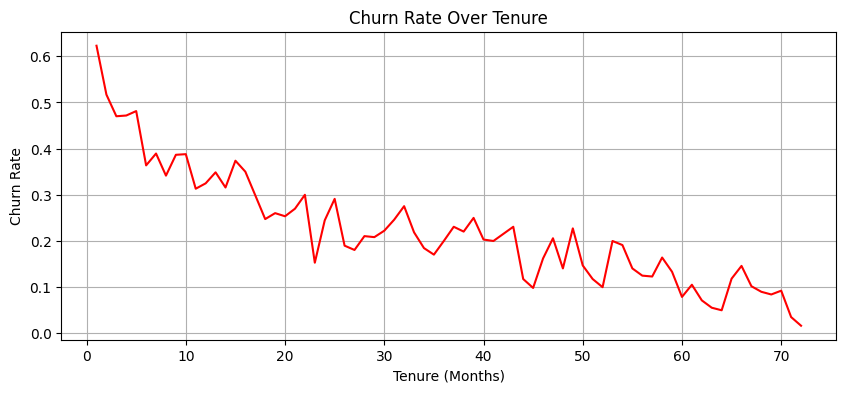

In [37]:
tenure_churn = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack().fillna(0)
tenure_churn['Yes'].plot(figsize=(10, 4), color='red')
plt.title('Churn Rate Over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

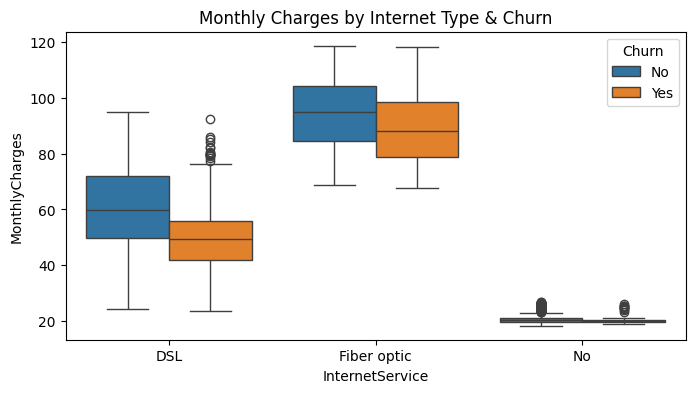

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='InternetService', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Internet Type & Churn')
plt.show()

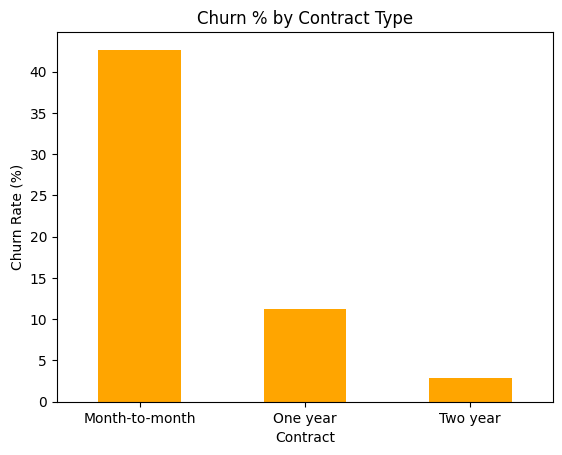

In [39]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
(contract_churn['Yes'] * 100).plot(kind='bar', color='orange')
plt.title('Churn % by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.show()

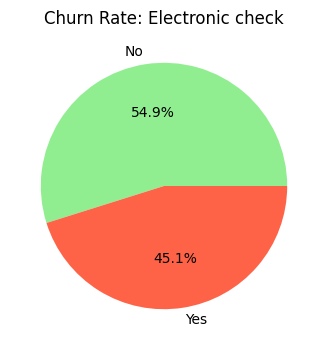

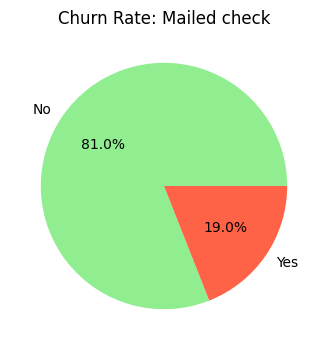

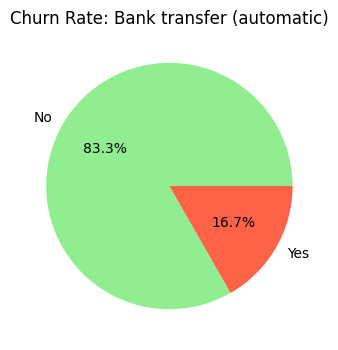

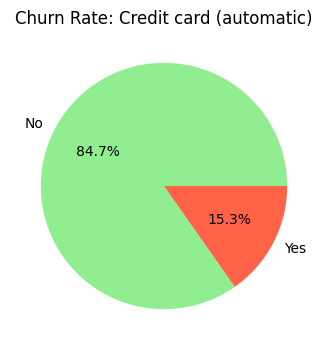

In [41]:
for method in df['PaymentMethod'].unique():
    subset = df[df['PaymentMethod'] == method]
    plt.figure(figsize=(4, 4))
    subset['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'tomato'])
    plt.title(f'Churn Rate: {method}')
    plt.ylabel('')
    plt.show()

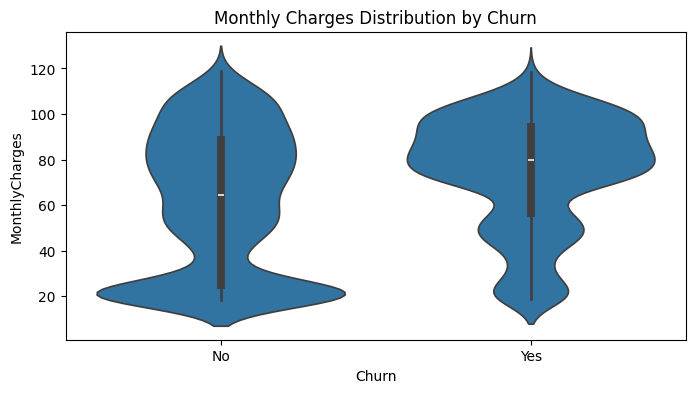

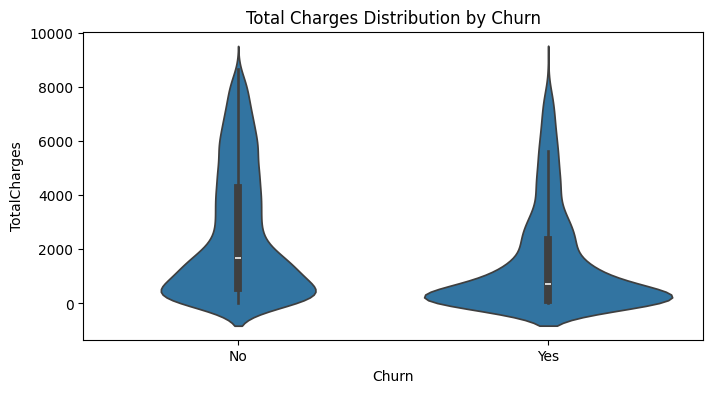

In [48]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

plt.figure(figsize=(8, 4))
sns.violinplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges Distribution by Churn')
plt.show()

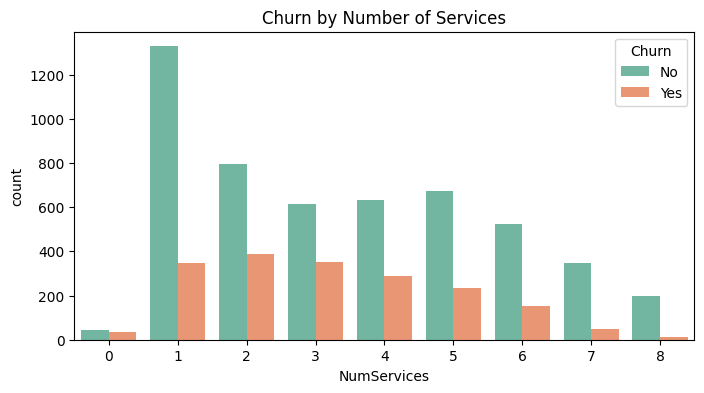

In [49]:
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['NumServices'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='NumServices', hue='Churn', palette='Set2')
plt.title('Churn by Number of Services')
plt.show()

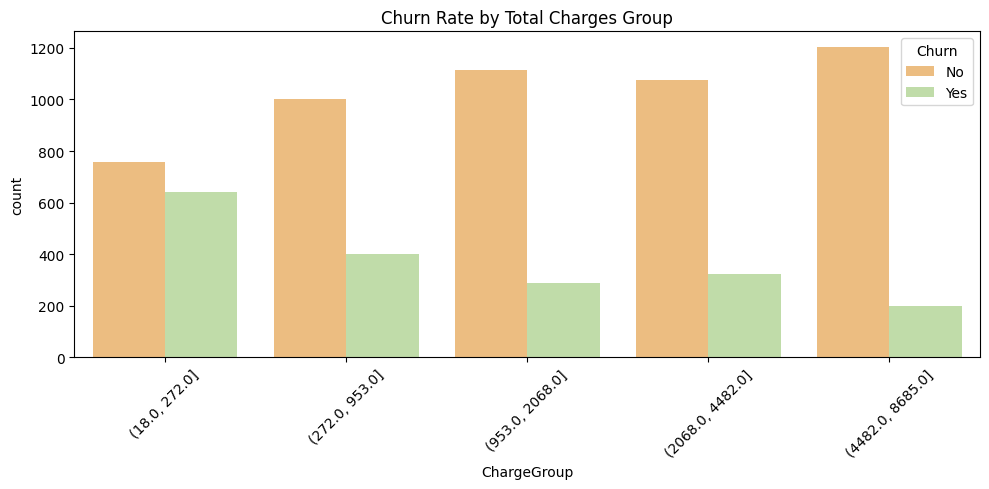

In [50]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['ChargeGroup'] = pd.qcut(df['TotalCharges'], q=5, precision=0)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='ChargeGroup', hue='Churn', palette='Spectral')
plt.title('Churn Rate by Total Charges Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

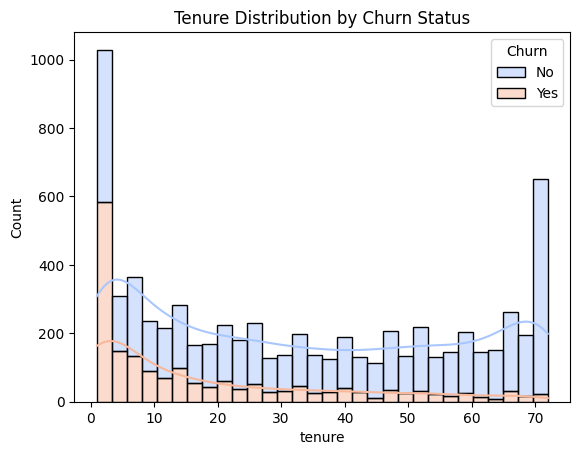

In [51]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='coolwarm', multiple='stack')
plt.title('Tenure Distribution by Churn Status')
plt.show()

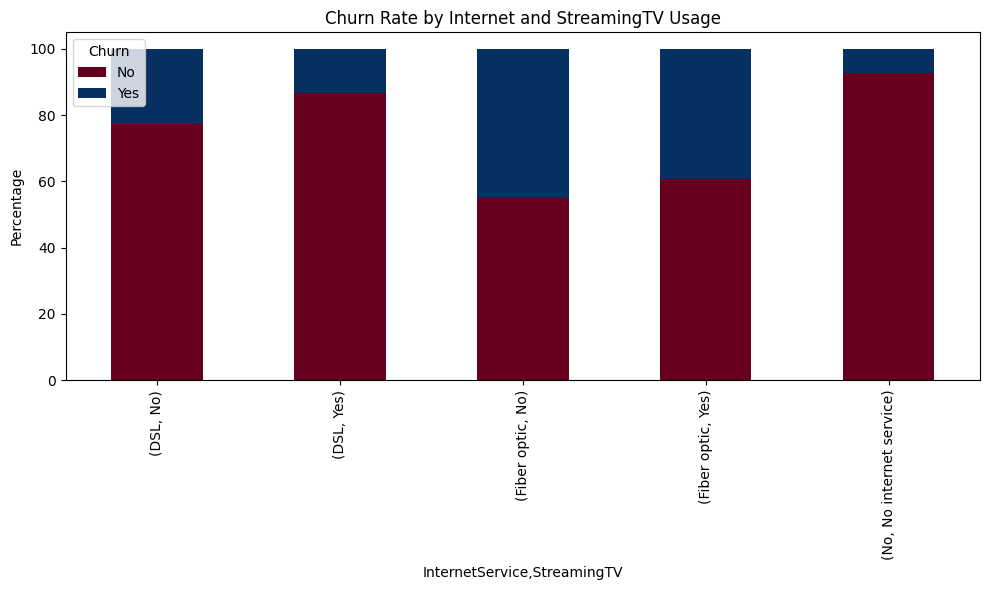

In [53]:
ct = pd.crosstab(index=[df['InternetService'], df['StreamingTV']], columns=df['Churn'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(10, 6))
plt.title('Churn Rate by Internet and StreamingTV Usage')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

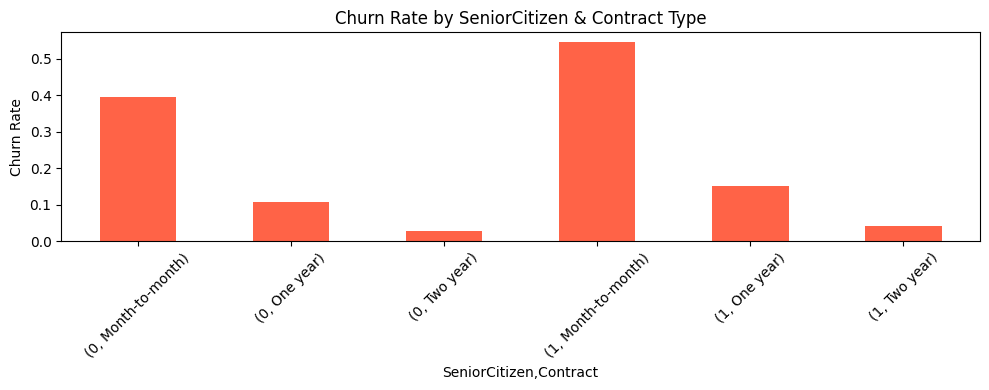

In [55]:
grouped = df.groupby(['SeniorCitizen', 'Contract'])['Churn'].value_counts(normalize=True).unstack().fillna(0)

grouped['Yes'].plot(kind='bar', figsize=(10, 4), color='tomato')
plt.title('Churn Rate by SeniorCitizen & Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

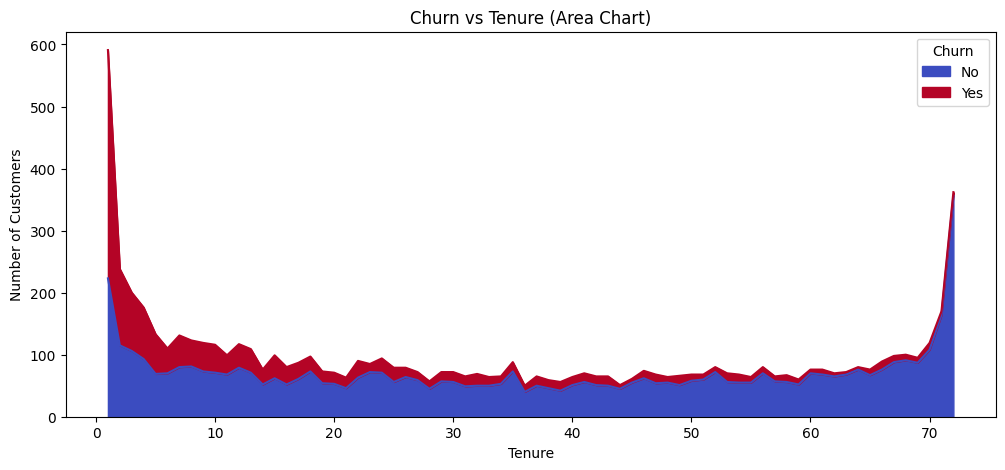

In [56]:
churn_by_tenure = df.groupby(['tenure', 'Churn']).size().unstack().fillna(0)
churn_by_tenure.plot.area(stacked=True, figsize=(12, 5), colormap='coolwarm')
plt.title('Churn vs Tenure (Area Chart)')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.show()

#### **Insights :**
- Destribution Chart :
    -  Partner
        - Customers are fairly balanced in terms of having a partner.

        - Slightly more customers do not have a partner.

    -  Dependents
        - A majority do not have dependents, indicating many single or non-family customers.
    
    -  PhoneService
        - Most customers have active phone service.
    
        - A small segment exists without phone service.
    
    -  MultipleLines
        - About equal distribution between having a single line and multiple lines.
    
        - Customers without phone service form a separate small group.
    
    -  InternetService
        - Fiber optic is the most common internet service.
    
        - A significant number also have DSL, and a notable group has no internet.
    
    -  OnlineSecurity
        - Majority of customers don’t have online security.
    
        - Everyone without internet also lacks this service (as expected).
    
    -  OnlineBackup
        - Similar trend: most do not have online backup.
    
        - Again, “No internet service” forms a significant subgroup.
    
    -  DeviceProtection
        - Roughly equal between those who have and don’t have device protection.
    
        - The "No internet" group is consistent across all related services.
    
    -  TechSupport
        - More customers lack technical support than those who have it.
    
    -  StreamingTV / StreamingMovies
        - These services are evenly split between users and non-users.
    
        - But a large segment has no access due to lack of internet.
    
    -  Contract
        - Most customers are on a month-to-month contract, which can suggest less loyalty.
    
        - Fewer customers commit to 1- or 2-year contracts.
    
    -  PaperlessBilling
        - Paperless billing is more popular, likely due to convenience or digital access.
    
    -  PaymentMethod
        - Electronic checks are the most used method.

- Customers with longer tenure tend to have higher total charges (strong correlation of 0.83).

- Monthly charges are moderately related to total charges but not strongly tied to how long a customer stays.

- Churn is highest among Month-to-month customers, especially those with higher monthly charges.

- One year and Two year contract customers churn less, even when paying high monthly charges.

- Customers with longer contracts show more stability, indicating contract length helps retain high-paying customers.

- About 26.5% of customers have churned, indicating a significant churn issue.

- The majority (73.5%) have stayed, but the churn rate is still high enough to warrant targeted retention strategies.

- Contract Type: Customers with month-to-month contracts have the highest churn, while those on one or two-year contracts are far more loyal.

- Internet Service: Customers using DSL or No Internet churn less than those using Fiber optic, which shows the highest churn.

- Payment Method: Churn is highest among customers using Electronic check, suggesting dissatisfaction or lack of commitment with this group.

- Senior Citizens: Senior citizens tend to churn more frequently than younger customers.

- Tech Support: Customers without tech support have higher churn, suggesting support services help improve retention.

- Early Tenure Risk: Customers in their first few months are much more likely to churn, with the churn rate above 60% initially.

- Decreasing Trend: As tenure increases, churn rate steadily decreases, showing that long-term customers are more likely to stay.

- Stable Loyalty Zone: After around 30–40 months, churn rate stabilizes below 20%, indicating a loyal customer base.

- Fiber Optic Churn Risk: Customers using Fiber optic have higher monthly charges and a higher churn rate compared to other internet types.

- DSL Users Are Stable: DSL customers have moderate charges and show less churn than Fiber optic users.

- No Internet = Low Churn: Customers without internet service have low and stable charges with very little churn.

- Month-to-Month = High Risk: Customers with month-to-month contracts have the highest churn rate (over 40%).

- Long-Term Contracts = Stability: One-year and especially two-year contracts show much lower churn, indicating customer retention improves with longer commitments.

- Electronic Check = High Churn: Nearly 45% of customers using electronic checks churned — the highest among all methods.

- Auto Payments = Low Churn: Credit card and bank transfer (automatic) users have churn rates below 17%, showing strong retention with auto-pay.

- Monthly Charges vs. Churn: Customers who churn tend to have higher monthly charges, suggesting pricing may influence churn.

- Total Charges vs. Churn: Churned customers generally have lower total charges, indicating they left the service earlier.

- Customers with fewer services (0–2) show a higher churn rate, indicating limited engagement leads to more drop-offs.

- As the number of services increases, churn decreases, suggesting customers using more services are more likely to stay.

- Customers with lower total charges have higher churn rates, especially in the first two charge groups.

- As total charges increase, churn rate declines steadily, indicating that long-term, high-paying customers are more loyal.

- High churn occurs in early tenure: A significant number of customers churn within the first 5–10 months of joining.

- Customers with long tenure rarely churn: Very few customers churn after 50+ months, indicating long-term customers are highly loyal.

- Churn declines as tenure increases: There’s a clear drop in churn as tenure lengthens, showing retention improves over time.

- New customers are at risk: The spike at tenure = 0–5 months suggests onboarding and early experience are critical in preventing churn.

- Fiber optic users churn more: Customers with fiber optic internet, especially without streaming TV, have the highest churn rates, suggesting dissatisfaction or pricing concerns.

- DSL users with streaming churn less: Those using DSL with Streaming TV show lower churn, possibly due to bundled value or fewer issues with speed expectations.

- No internet = low churn: Customers without any internet service have the lowest churn rate, indicating they are likely low-usage or legacy customers with fewer service interactions.

- Most customer churn happens early, especially in the first few months of tenure.

- Customers who stay longer (over 60 months) are much more likely to remain loyal and not churn.

In [71]:
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
               'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    if col == 'gender':
        df[col] = df[col].map({'Male': 1, 'Female': 0})
    elif col == 'SeniorCitizen':
        df[col] = df[col].astype(int) 
    else:
        df[col] = df[col].map({'Yes': 1, 'No': 0})


In [72]:
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [73]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [74]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [75]:
df.sample(13)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1831,0,1,1,0,22,1,1,1,1,0,...,63.55,1381.8,0,0,0,0,0,0,0,1
2467,1,0,1,1,49,1,1,0,0,0,...,97.95,4917.9,0,1,0,1,0,0,1,0
4064,0,0,0,0,1,1,0,1,0,0,...,50.15,50.15,0,0,0,0,0,0,1,0
4111,0,0,0,0,22,1,0,0,1,1,...,65.25,1441.8,0,0,0,1,0,0,0,0
6378,1,0,1,1,13,1,0,1,0,0,...,84.05,1095.3,1,1,0,0,0,0,1,0
3495,1,1,0,0,1,1,1,0,0,0,...,75.35,75.35,1,1,0,0,0,0,1,0
5684,0,1,1,0,58,1,0,1,1,0,...,105.50,6205.5,1,1,0,1,0,1,0,0
4584,1,1,0,0,69,1,1,1,0,1,...,74.10,5031,0,0,0,0,1,1,0,0
6823,0,0,0,0,4,1,0,1,0,0,...,50.55,235.65,0,0,0,0,0,0,0,0
2739,0,0,1,0,61,1,1,0,0,0,...,101.15,6383.9,0,1,0,1,0,0,0,0


In [76]:
df.select_dtypes(include=['object'])

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


### 2. Check if there is an imbalance in data. If there is an imbalance in data, resolve it.

In [90]:
df['Churn'].value_counts(normalize=True)


Churn
0    0.735093
1    0.264907
Name: proportion, dtype: float64

In [91]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [93]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled= smote.fit_resample(x_train, y_train)

In [94]:
y_train_resampled.value_counts()

Churn
0    4165
1    4165
Name: count, dtype: int64

### 3. Build a Logistic Regression classification model which will predict whether a customer is at risk to churn from the platform

In [96]:
log_reg = LogisticRegression()

In [98]:
log_reg.fit(x_train_resampled, y_train_resampled)

c:\Users\soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
y_pred = log_reg.predict(x_test)

In [102]:
accuracy_score(y_test, y_pred)

0.7574893009985735

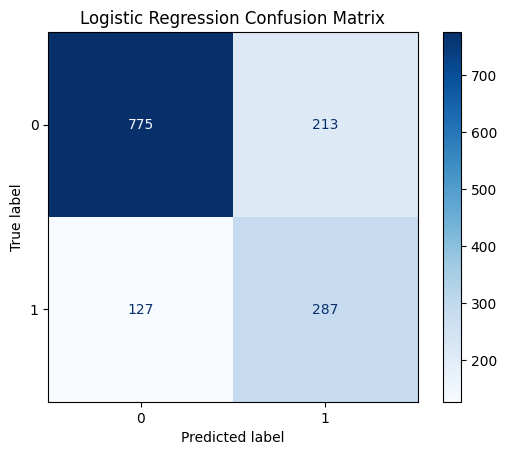

In [103]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### 4. Build Naive Bayes model which will predict whether a customer is at risk to churn from the platform.

In [105]:
nb_model = GaussianNB()

In [107]:
nb_model.fit(x_train_resampled, y_train_resampled)

GaussianNB()

In [109]:
y_pred_nb = nb_model.predict(x_test)

In [110]:
accuracy_score(y_test, y_pred_nb)

0.7496433666191156

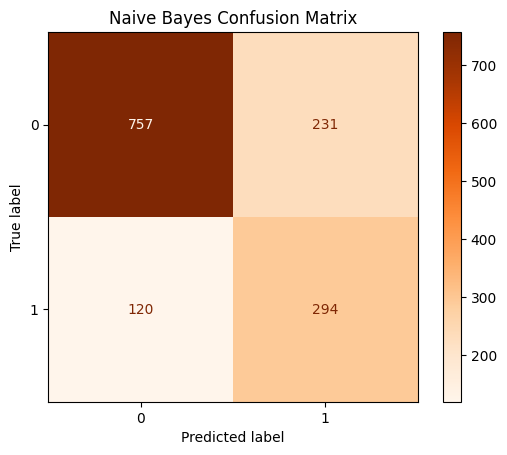

In [111]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, cmap='Oranges')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### 5. Build a K-nearest classifier which will predict whether a customer is at risk to churn from the platform.

In [113]:
scaler = StandardScaler()

In [118]:
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

In [119]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [120]:
knn_model.fit(x_train_scaled, y_train_resampled)

KNeighborsClassifier()

In [121]:
y_pred_knn = knn_model.predict(x_test_scaled)

In [122]:
accuracy_score(y_test, y_pred_knn)

0.7139800285306704

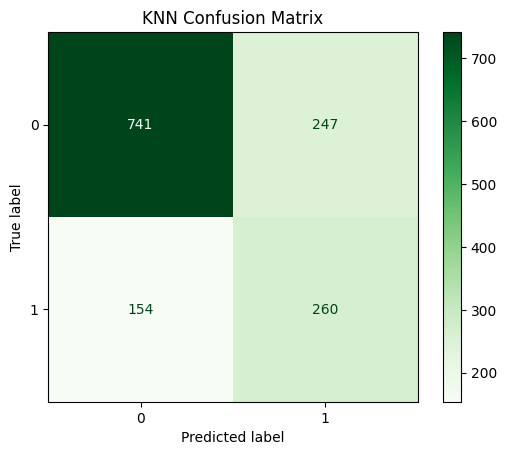

In [123]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.show()

### 6. Find optimal parameters for the algorithm through GridSearchCV and build SVC model which will predict whether a customer is at risk to churn from the platform.

In [127]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [128]:
svc = SVC()

In [137]:
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

In [138]:
grid_search_svc.fit(x_train_scaled, y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [139]:
best_svc = grid_search_svc.best_estimator_

In [140]:
y_pred_svc = best_svc.predict(x_test_scaled)

In [141]:
accuracy_score(y_test, y_pred_svc)

0.7703281027104137

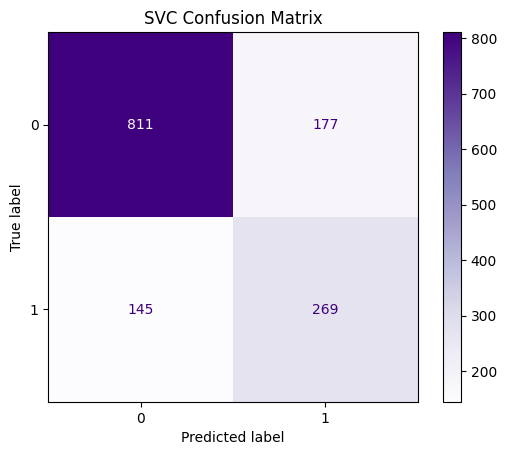

In [142]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, cmap='Purples')
plt.title("SVC Confusion Matrix")
plt.show()

### 7. Find optimal parameters for the algorithm through GridSearchCV and build a Decision tree which will predict whether a customer is at risk to churn from the platform.

In [145]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [157]:
dtree = DecisionTreeClassifier()

In [147]:
grid_search_dt = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

In [148]:
grid_search_dt.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [149]:
best_dtree = grid_search_dt.best_estimator_

In [150]:
y_pred_dt = best_dtree.predict(x_test)

In [151]:
accuracy_score(y_test, y_pred_dt)

0.7432239657631954

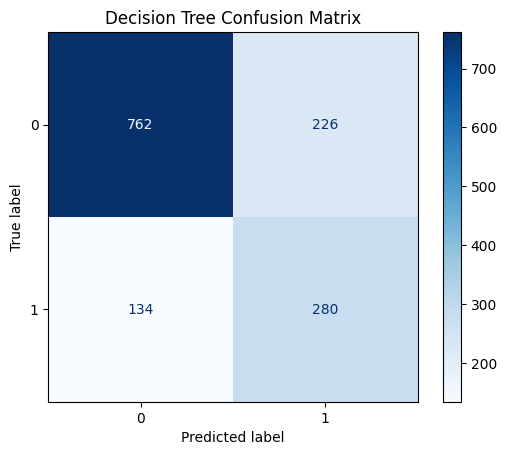

In [152]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

### 8. Find optimal parameters for the algorithm through RandomSearchCV and build a Random which will predict whether a customer is at risk to churn from the platform.

In [154]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [156]:
rf = RandomForestClassifier()

In [159]:
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=50,
    cv=5, scoring='accuracy'
)

In [160]:
random_search_rf.fit(x_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [161]:
best_rf = random_search_rf.best_estimator_

In [162]:
y_pred_rf = best_rf.predict(x_test)

In [163]:
accuracy_score(y_test, y_pred_rf)

0.7738944365192582

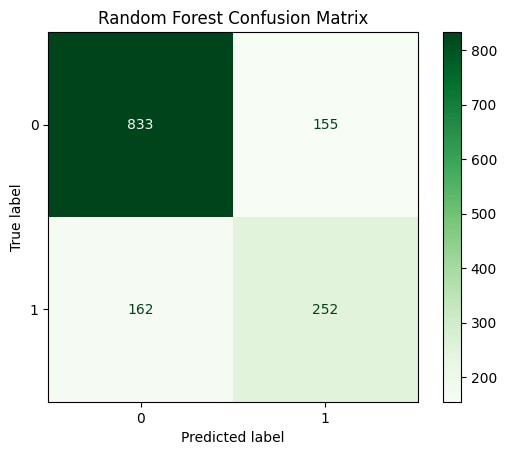

In [164]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

### 9. Model Selection: Evaluate and compare performance of all the models to find the best model.

In [165]:
models = {
    "Logistic Regression": log_reg,
    "Naive Bayes": nb_model,
    "KNN": knn_model,
    "SVC (GridSearch)": best_svc,
    "Decision Tree (GridSearch)": best_dtree,
    "Random Forest (RandomSearch)": best_rf
}

In [166]:
results = {}

for name, model in models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.7575
Naive Bayes: Accuracy = 0.7496
KNN: Accuracy = 0.7047
SVC (GridSearch): Accuracy = 0.2953
Decision Tree (GridSearch): Accuracy = 0.7432


c:\Users\soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Random Forest (RandomSearch): Accuracy = 0.7739


In [167]:
model_names = list(results.keys())
accuracy_scores = list(results.values())

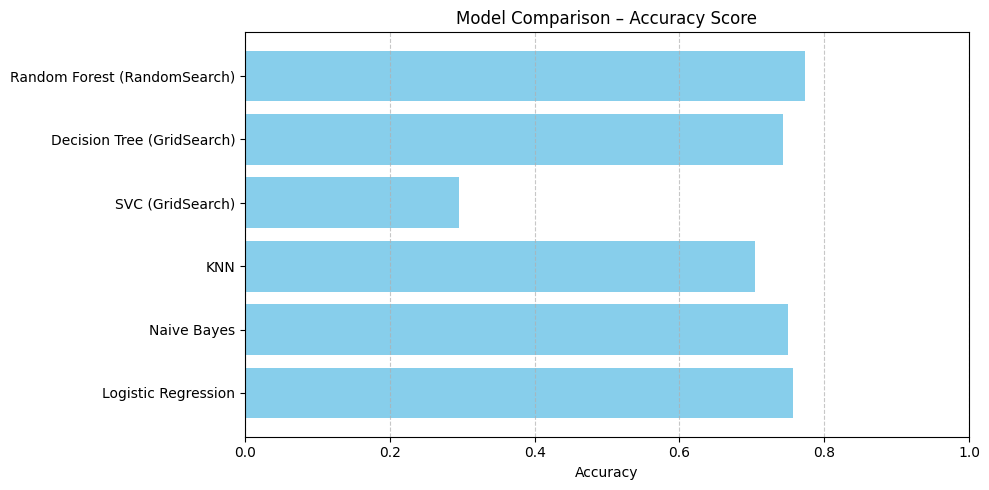

In [168]:
plt.figure(figsize=(10, 5))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison – Accuracy Score")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Conclusion Summary:

Among all models, Random Forest with RandomizedSearchCV achieved the highest accuracy (~78%) and proved to be the most reliable for predicting customer churn. Logistic Regression and Naive Bayes also performed well, offering simplicity and speed with decent accuracy. The SVC model underperformed significantly and is not recommended. Overall, Random Forest is the best choice for this dataset.